In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Загружаем изображение

'demonstration_image'

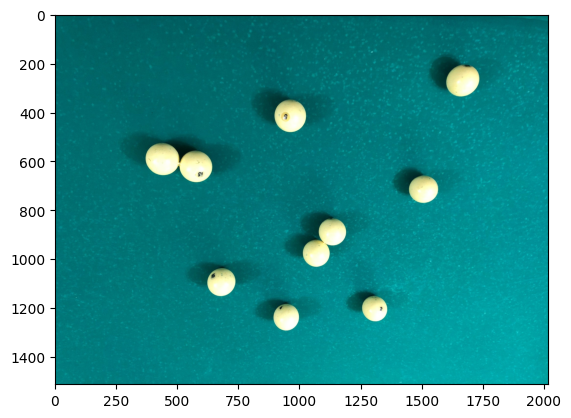

In [10]:
input_image = cv2.imread("C:\\Users\\mark0wka\\Downloads\\whiteballssample.jpg")
demonstration_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(demonstration_image)
"demonstration_image"

# Предобработка
Подбором определил, что пороговое значение равное 130 наиболее удачное, т.к. на изображении получается мало шумов и размер шаров практически не страдает.<br>
Заменим все пиксели, что темнее (меньше) 130 на 0, а все, которые ярче (больше) 130 на 255

'threshold_image'

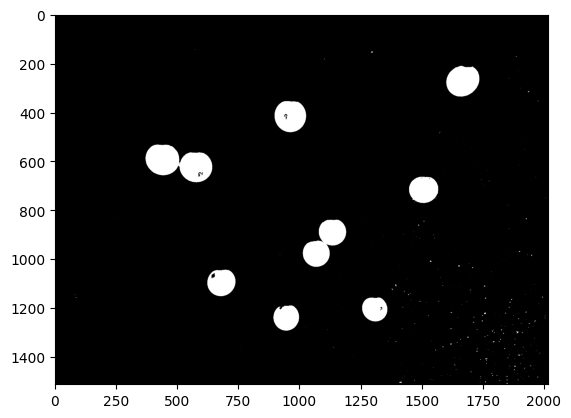

In [11]:
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
ret, threshold_image = cv2.threshold(gray_image, 130, 255, 0)
plt.imshow(threshold_image, cmap = "gray")
"threshold_image"

# Удаление шума
Удалим шум с помощью морфологической операции (операция открытие).

'no_noise_image'

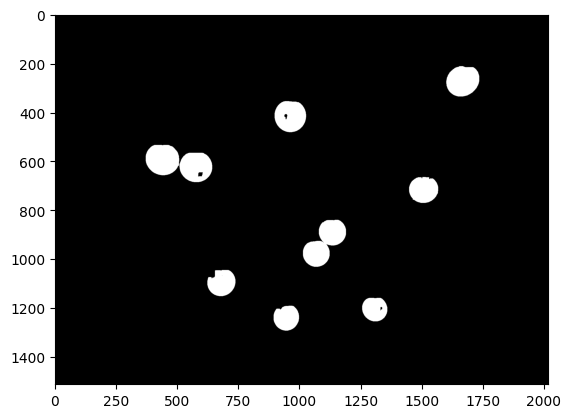

In [12]:
kernel = np.ones((5, 5), np.uint8)
no_noise_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel, iterations = 3)
plt.imshow(no_noise_image, cmap = "gray")
"no_noise_image"

# "Разлипание" шаров
Применим функцию размытия erode для "разлипания" шаров друг от друга 

'erode_image'

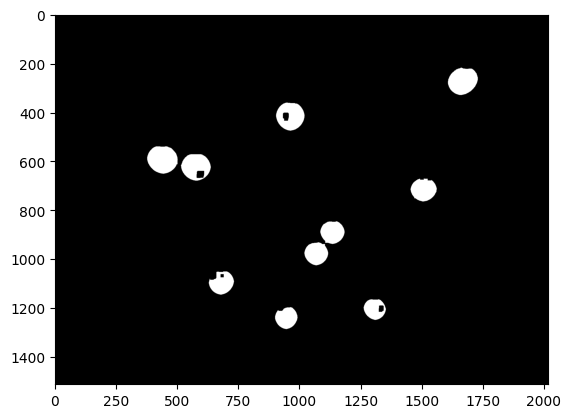

In [13]:
erode_image = cv2.erode(no_noise_image, kernel, iterations = 3)
plt.imshow(erode_image, cmap = "gray")
"erode_image"

# Подсчет шаров
Найдем все контуры получившихся фигур, наложим их на gray_image и выведем число получившихся контуров

'Число шаров: 10'

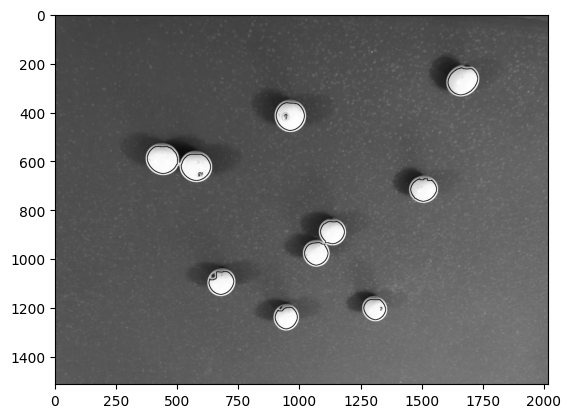

In [14]:
contours, hierarchy = cv2.findContours(erode_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copied_gray_image = gray_image.copy()
cv2.drawContours(copied_gray_image, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(copied_gray_image, cv2.COLOR_BGR2RGB))
f"Число шаров: {len(contours)}"

Посчитаем ширину и высоту каждого контура

'result_image'

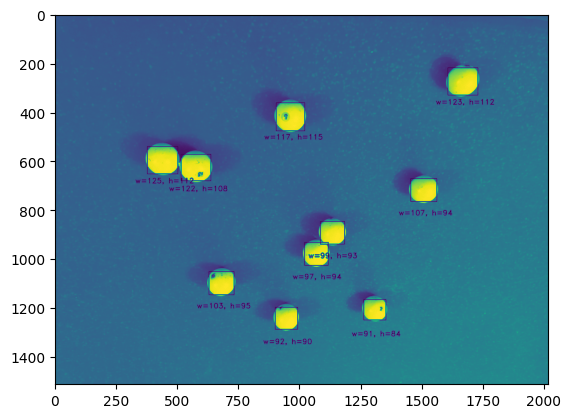

In [15]:
width = []
height = []
result_image = gray_image.copy()
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    width.append(w)
    height.append(h)
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 255), 2)
    cv2.putText(result_image, f"w={w}, h={h}", (x - 50, y + 150), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 2)
plt.imshow(result_image)
"result_image"

А теперь посчитаем средний радиус шаров и вычислим дисперсию этой величины

In [16]:
radiuses = []
for i in range(len(contours)):
    radiuses.append((height[i] + width[i])/4)
print(f"Все радиусы: {radiuses}")
average_radius = sum(radiuses)/len(radiuses)
print(f"Средний радиус: {average_radius}")
sum_of_squared_difference = 0
for i in radiuses:
    sum_of_squared_difference += (i - average_radius)**2
dispersion = sum_of_squared_difference/len(radiuses)
print(f"Дисперсия: {dispersion}")

Все радиусы: [45.5, 43.75, 49.5, 47.75, 48.0, 50.25, 57.5, 59.25, 58.0, 58.75]
Средний радиус: 51.825
Дисперсия: 31.775624999999998
